# Predict Exercise Induced Angina

### AUTHORS: Augustine Yao(Jingqi), Danny Guan, Edmond Ye, Emily Huang.


## Introduction:
Angina is chest pain caused by reduced blood supply to the heart and is a symptom of coronary artery disease (“Coronary”). Angiotensin-converting enzyme (ACE) inhibition has been demonstrated to reduce the incidence of exercise-induced angina (Kaski). This implies that higher blood pressure is correlated to the incidence of angina, as ACE is primarily responsible for hypertension. A study also showed that celiprolol decreases maximum exercise heart rate, systolic blood pressure, and ST segment depression—an indicator for angina—suggesting a possible predictive relationship between exercise heart rate and onset of angina (Caopone).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/A_man_having_a_Heart_Attack.png/300px-A_man_having_a_Heart_Attack.png" alt="An illustration of a man experiencing angina." width="300">&emsp;&emsp;&emsp;&emsp;<img src="https://upload.wikimedia.org/wikipedia/commons/c/c3/Angina_pectoris.png" alt="Diagram of areas of discomfort caused by coronary artery disease." width="200"><br/>
An illustration of a man experiencing angina and a diagram of areas of discomfort caused by coronary artery disease. <a href="https://en.wikipedia.org/wiki/Angina"> (Source) </a><br/>
<img src="https://3.bp.blogspot.com/_A8JQOadS528/TSFhp2v_0-I/AAAAAAAAACs/2nte3XOUPq4/s1600/ECG+Interpretation+Review+-12+-+WB+Table+-+ST+Segment+Elevation-J-Point.jpg" alt="ECG graphs showing a normal ST segment, ST elevation, and ST depression."><br/>
ECG graphs showing a normal ST segment, ST elevation, and ST depression. <a href="https://ecg-interpretation.blogspot.com/2011/01/ecg-interpretation-review-12.html">(Source)</a>

Heart disease data from Switzerland and Hungary was used for this project. The data was from a directory containing 4 databases with heart disease data from Cleveland, Budapest, Long Beach, and Zurich, collected 1988. The datasets are all in the same format with 14 columns：

- `age`
- `sex`
- `cp`, chest pain type
- `trestbps`, resting blood pressure
- `chol`, serum cholesterol
- `fbs`, fasting blood sugar
- `restecg`, resting ECG results
- `thalach`, max heart rate achieved
- `exang`, exercise-induced angina
- `oldpeak`, ST depression induced by exercise relative to rest
- `slope`, slope of peak exercise ST segment
- `ca`, number of major vessels coloured by fluoroscopy
- `thal`, presence of defect
- `num`, diagnosis of heart disease

The variables we are concerned with are `trestbps`, resting systolic blood pressure in mmHg; `thalach`, maximum heart rate achieved in bpm; and `exang`, incidence of exercise-induced angina, where 1 = yes and 0 = no. The original datasets did not have column names, so we added them manually based on the accompanying <a href="https://archive.ics.uci.edu/ml/datasets/heart+disease">database abstract.</a>
</br> </br>
- The question we are trying to answer is: **Base on resting blood pressure and exercising heart rate, predict whether a patient will experience exercise-induced angina?**

## Methods & Results
The Heart disease dataset provides us with two different regions to account for: **Switerland** and **Hungary**. Our team decided to combine the two regions to create more comprehensive data to better equip our model. Here is an overview of our data analysis methodology (detailed explanation will be presented at each step):

1. **Reading & Wrangling**: read and wrangle the dataset into one tidy combined dataset of the two regions.
2. **Perform a summary** of the data set that is relevant for exploratory data analysis related to the planned analysis 
3. **Create a visualization** of the dataset that is relevant for exploratory data analysis related to the planned analysis
4. **Train/Test split**: splitting the tidy dataframe into a training set and testing set, then summarizing the sample statistics of the training data.
5. **K-Nearest Neighbor classification**: model tuning with cross-validation, reconfigure and re-train the model with the best K parameter, predict the test set for final model accuracy validation.
6. **Results and Conclusion**

### Load Datasets From the Web

In [74]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

In [75]:
#below is the link of our dataset
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data"
url1 <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data"

heart_disease_data_link <- read_csv(url, col_names = FALSE, na = c("?")) # dataset of Swizerland
heart_disease_data_link2 <-  read_csv(url1, col_names = FALSE, na = c("?")) # dataset of Hungary

Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Reading and Wrangling Data
- Two datasets are used, we read them separately and merge them into a single dataframe called heart_disease_data.
- The dataset for the Switzerland region has no column names and a total of 121 rows, thus, we assign names to all the columns.
- The dataset for the Hungary region has no column names and a total of 293 rows, thus, we assign names to all the columns.
- For both datasets, we have to drop all the observations with na value, we use the drop_na function for both datasets.
- For both datasets, we have to filter out the observations with the value of 0, we use the filter function for both datasets.
- The rows of both regions are combined to form one dataset using the rbind function.
- Use glance to check the structure of the combined dataset.
- The resulting dataset is heart_disease_data_final with 414 observations.

In [76]:
switzerland_data <- heart_disease_data_link |>
    setNames(c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")) |>#set names for each columns
    mutate(exang = as_factor(exang)) |> #change the exang column to a factor
    drop_na(trestbps) |> #drop all the na from trestbps
    drop_na(thalach) |> #drop all the na from thalach
    filter(thalach != 0)|> #filter the useless data
    filter(trestbps != 0)



hungary_data <-  heart_disease_data_link2 |>
    setNames(c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")) |>#set names for each columns
    mutate(exang = as_factor(exang)) |> #change the exang column to a factor
    drop_na(trestbps) |> #drop all the na from trestbps
    drop_na(thalach) |> #drop all the na from thalach
    filter(thalach != 0)|> #filter the useless data
    filter(trestbps != 0)


heart_disease_data <- rbind(switzerland_data, hungary_data) # use rbind to combine the two datasets by adding rows

heart_disease_data_final <- heart_disease_data %>%
    select("trestbps", "thalach", "exang") # select the columns that we will use

glance <- heart_disease_data%>%
    head(6)

heart_disease_data_final
glance

trestbps,thalach,exang
<dbl>,<dbl>,<fct>
95,127,0
115,154,0
110,125,1
⋮,⋮,⋮
155,150,1
180,110,1
130,115,1


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
32,1,1,95,0,NA,0,127,0,0.7,1,NA,NA,1
34,1,4,115,0,NA,NA,154,0,0.2,1,NA,NA,1
36,1,4,110,0,NA,0,125,1,1.0,2,NA,6,1
38,0,4,105,0,NA,0,166,0,2.8,1,NA,NA,2
38,0,4,110,0,0,0,156,0,0.0,2,NA,3,1
38,1,3,100,0,NA,0,179,0,-1.1,1,NA,NA,0


<table>
    <caption>Table 1.0 Glance at dataset</caption>
    <tr>
        <th>age</th>
        <th>sex</th>
        <th>cp</th>
        <th>trestbps</th>
        <th>chol</th>
        <th>fbs</th>
        <th>restecg</th>
        <th>thalach</th>
        <th>exang</th>
        <th>oldpeak</th>
        <th>slope</th>
        <th>ca</th>
        <th>thal</th>
        <th>num</th>
    </tr>
    <tr>
        <td>32</td>
        <td>1</td>
        <td>1</td>
        <td>95</td>
        <td>0</td>
        <td>NA</td>
        <td>0</td>
        <td>127</td>
        <td>0</td>
        <td>0.7</td>
        <td>1</td>
        <td>NA</td>
        <td>NA</td>
        <td>1</td>
    </tr>
    <tr>
        <td>34</td>
        <td>1</td>
        <td>4</td>
        <td>115</td>
        <td>0</td>
        <td>NA</td>
        <td>NA</td>
        <td>154</td>
        <td>0</td>
        <td>0.2</td>
        <td>1</td>
        <td>NA</td>
        <td>NA</td>
        <td>1</td>
    </tr>
    <tr>
        <td>36</td>
        <td>1</td>
        <td>4</td>
        <td>110</td>
        <td>0</td>
        <td>NA</td>
        <td>0</td>
        <td>125</td>
        <td>1</td>
        <td>1.0</td>
        <td>2</td>
        <td>NA</td>
        <td>6</td>
        <td>1</td>
    </tr>
    <tr>
        <td>38</td>
        <td>0</td>
        <td>4</td>
        <td>105</td>
        <td>0</td>
        <td>NA</td>
        <td>0</td>
        <td>166</td>
        <td>0</td>
        <td>2.8</td>
        <td>1</td>
        <td>NA</td>
        <td>NA</td>
        <td>2</td>
    </tr>
    <tr>
        <td>38</td>
        <td>0</td>
        <td>4</td>
        <td>115</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>156</td>
        <td>0</td>
        <td>0.0</td>
        <td>2</td>
        <td>NA</td>
        <td>3</td>
        <td>1</td>
    </tr>
    <tr>
        <td>38</td>
        <td>1</td>
        <td>3</td>
        <td>100</td>
        <td>0</td>
        <td>NA</td>
        <td>0</td>
        <td>179</td>
        <td>0</td>
        <td>-1.1</td>
        <td>1</td>
        <td>NA</td>
        <td>NA</td>
        <td>0</td>
    </tr>
</table>

- As can be seen from the table1.0, the dataset is in good shape.

### Summary of dataset

#### Below our group will do the basic summary of the data in the dataset we used
* 1. Summary of the mean, max and min of resting blood pressure and max heart rate achieved.
* 2. Summary of the number and percentage of samples with different factor value (exang).
* 3. Summary of the difference on age according to whether they have Exercise Induced Angina or not.

In [77]:
trestbps_and_thalach <- heart_disease_data %>%
        summarize(mean_thresbps = mean(trestbps), # mean
                mean_thalach = mean(thalach),
                 max_thresbps = max(trestbps), # max
                 max_thalach = max(thalach),
                 min_thalach = min(thalach), #min
                  min_thresbps = min(trestbps))
trestbps_and_thalach

mean_thresbps,mean_thalach,max_thresbps,max_thalach,min_thalach,min_thresbps
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
131.8889,133.9734,200,190,60,80


<table>
    <caption>Table 1.1 Mean, max and min bp and achieved heart rate</caption>
    <tr>
        <th>mean resting bp</th>
        <th>mean achieved heart rate</th>
        <th>max resting bp</th>
        <th>max achieved heart rate</th>
        <th>min resting bp</th>
        <th>min achieved heart rate</th>
    </tr>
    <tr>
        <td>131.8889</td>
        <td>133.9734</td>
        <td>200</td>
        <td>190</td>
        <td>80</td>
        <td>60</td>
    </tr>
</table>

- Table 1.1 reports the columns used for prediction, including their mean, max, and min. The mean value of the column is approximately the mean of the column's max and min values, which indicates the data in the dataset is well distributed.

In [78]:
trestbps_proportions <- heart_disease_data|>
group_by(exang)|>
summarize(n = n())|>
mutate(percentage = 100*n/nrow(heart_disease_data))

trestbps_proportions

exang,n,percentage
<fct>,<int>,<dbl>
0,272,65.70048
1,142,34.29952


<table>
    <caption>Table 1.2 Ratio of angina/no angina</caption>
    <tr>
        <th>angina</th>
        <th>n</th>
        <th>percentage</th>
    </tr>
    <tr>
        <td>yes</td>|
        <td>272</td>
        <td>60.7</td>
    </tr>
    <tr>
        <td>no</td>
        <td>142</td>
        <td>34.3</td>
    </tr>
</table>

- Table 1.2 reports the number of people without the problem of angina is approximately two times the number of people with the problem of angina. Also, we can see the percentage of people with angina and without angina.

In [79]:
age_1 <- heart_disease_data %>%
    filter(exang == 1) %>% # people with angina
    summarize(age_mean_with_angina = mean(age)) # summarize the mean age of people who has angina
age_0 <- heart_disease_data %>%
    filter(exang == 0) %>% # people without angina
    summarize(age_mean_without_angina = mean(age)) # summarize the mean age of people who has angina
age_1
age_0

age_mean_with_angina
<dbl>
52.40845


age_mean_without_angina
<dbl>
48.79044


<table>
    <caption>Table 1.3 Mean age with and without angina</caption>
    <tr>
        <th>angina</th>
        <th>mean age</th>
    </tr>
    <tr>
        <td>yes</td>
        <td>52.4</td>
    </tr>
    <tr>
        <td>no</td>
        <td>48.8</td>
    </tr>
</table>

- Table 1.3 reports the difference in age for the group of people with angina and the group of people without angina is relatively small (only 4 years), thus, age should not be considered as a predictor.

### Visulization of Dataset
* 1. Scatter plot of resting blood pressure and max heart rate by the value of exang.
* 2. Histogram of people with angina by their ages.

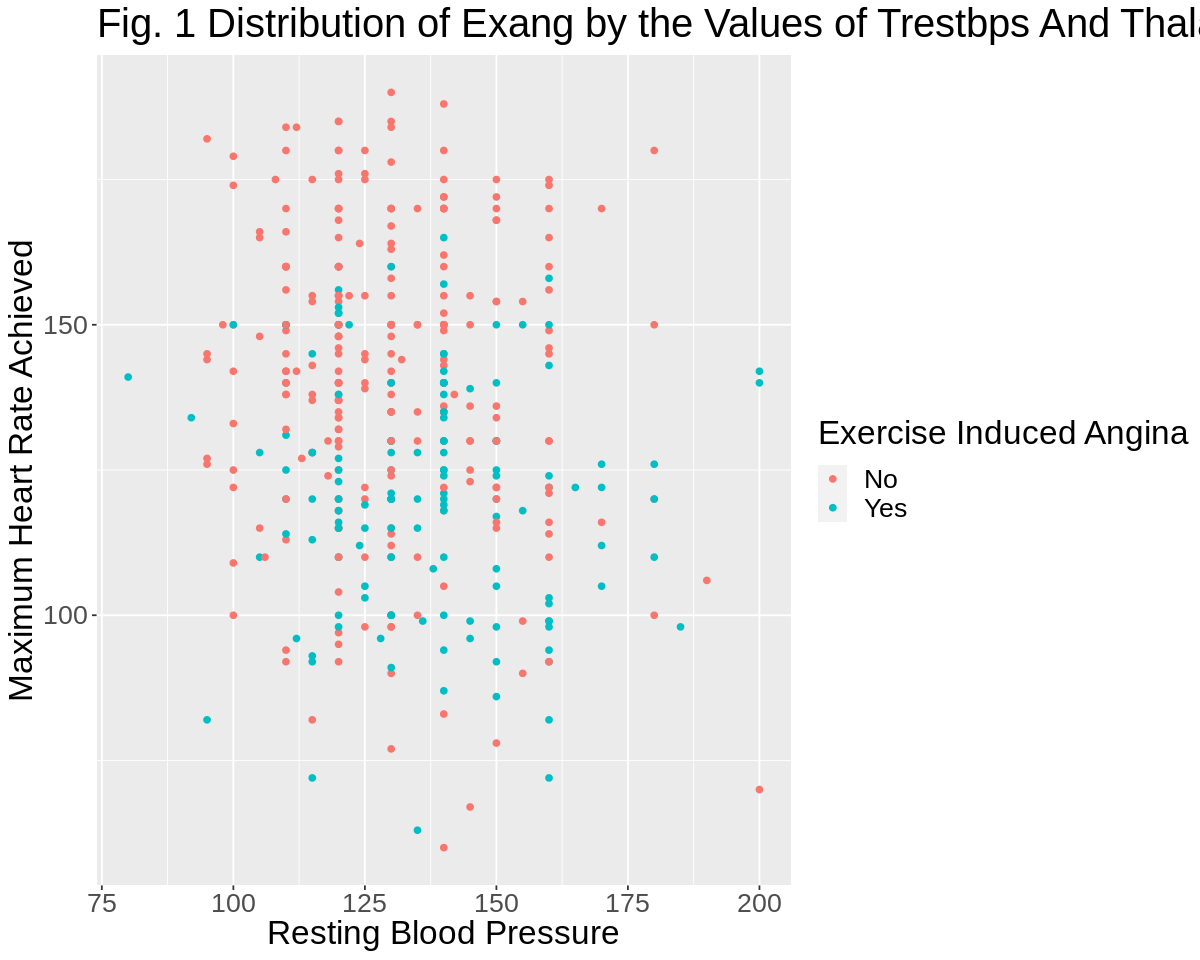

In [80]:
# Scatter plot
options(repr.plot.width = 10, repr.plot.height = 8) # set the size
heart_disease_dist <- ggplot(heart_disease_data, aes(x = trestbps, y = thalach, color = exang))+ # select two varibles used
    geom_point()+
    labs(x = "Resting Blood Pressure", y = "Maximum Heart Rate Achieved") +
    ggtitle("Fig. 1 Distribution of Exang by the Values of Trestbps And Thalach")+
    scale_color_discrete(name = "Exercise Induced Angina", labels = c("No", "Yes")) +
    theme(text = element_text(size = 20))

heart_disease_dist

- From figure.1, we can clearly see that for the group of people without angina, the points are distributed among the top left corner of the graph, which indicates they usually have a high Maximum Heart Rate and low Resting Blood Pressure. For the group of people without angina, the points are distributed on the opposite corner indicating low Maximum Heart Rate and high Resting Blood Pressure.

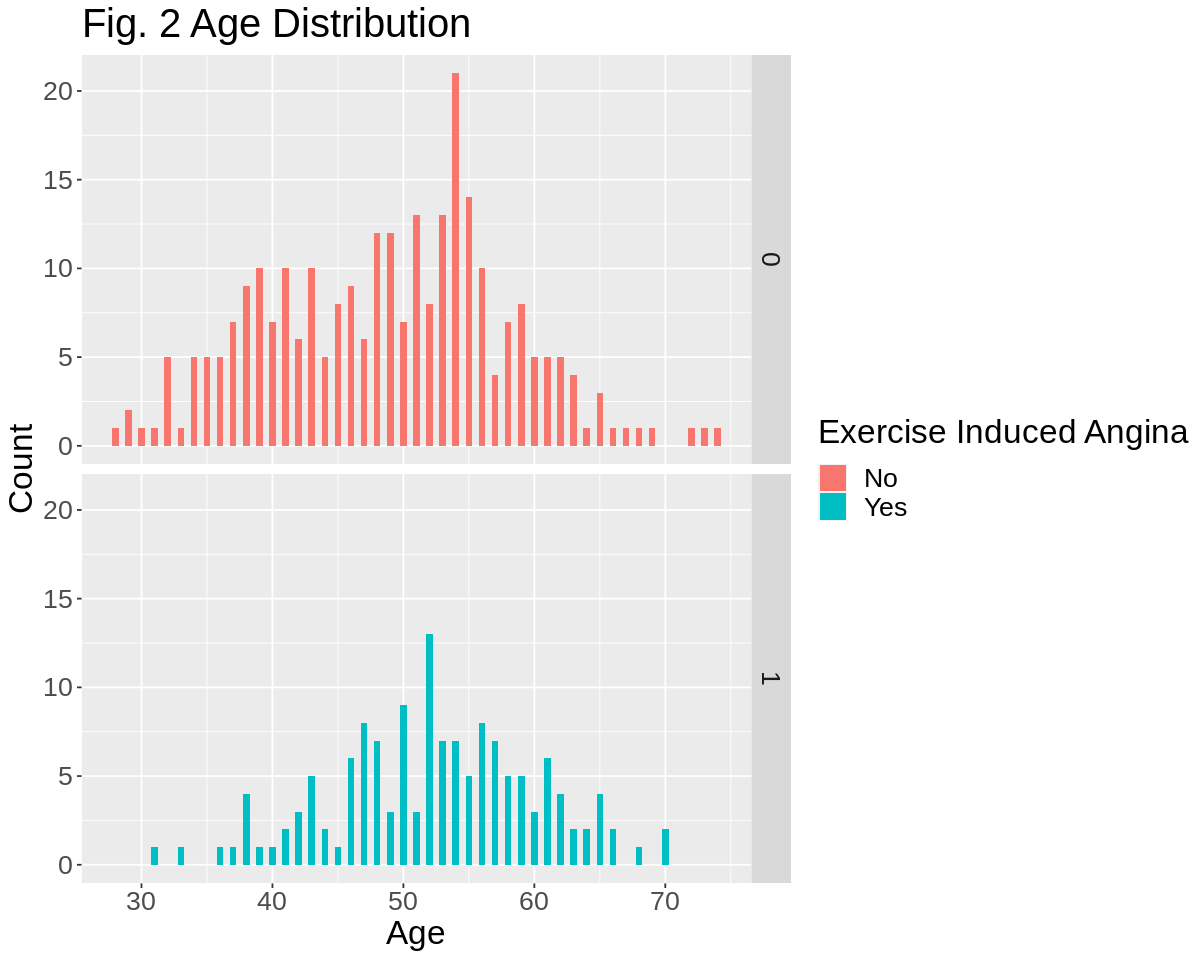

In [81]:
heart_disease_age <- heart_disease_data %>%    
    ggplot(aes( x= age, fill = exang))+
    geom_histogram(binwidth = 0.5, position = "identity",) +
    labs( x= "Age", y = "Count") +
    facet_grid(rows = vars(exang)) + # split the plot into two subplot with different predicting values
    ggtitle("Fig. 2 Age Distribution")+
    scale_fill_discrete(name = "Exercise Induced Angina", labels = c("No", "Yes")) +
    theme(text = element_text(size = 20))

heart_disease_age    

- From figure.2, we can see that the age distribution for people with angina and without angina is relatively the same pattern, thus, age will not be a good predictor for the question we set.

### Data Analysis

- Based on our data wrangling step, we have a total of 417 usable observations.
- Thus, we have made a random split of 0.75, which means 75% of the data is split into the training set and the remaining 25% into the test set to ensure that we have an adequate amount of observations for training and evaluating the prediction accuracy of our model.
- We also used `set.seed()` for reproducible results as `initial_split()` randomly samples from the dataframe.

For the model used by the project, we choose to construct a k-nn classification model, because the result our group wants to predict is: whether the person has angina or not, which is a categorical value, most suitable for classification.


- First random split the whole dataset into two parts, 75% of the data into the training set and 25% into the test set.

In [82]:
# Create the training set and testing set
set.seed(1)
heart_disease_split <- initial_split(heart_disease_data_final, prop = 0.75, strata = exang)
heart_disease_training <-training(heart_disease_split)
heart_disease_testing <- testing(heart_disease_split)


- Use k-nn classification model specification function.

In [83]:
# Below is the k-nn classification model specification
heart_disease_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>% # set the engine to kknn
    set_mode("classification") # set the mode to classification



- Create the recipe for the model, our group choose two variables as the predictors for the exang. The two predictors are trestbps and thalach.

In [84]:
# Below is the recipe for the model, in the recipe, our group choose two variables as the predictors for the exang, the two  predictors are trestbps and thalach.
heart_disease_recipe <- recipe(exang ~ trestbps + thalach, data = heart_disease_training) %>% # using training set to set the recipe
    step_scale(all_predictors()) %>% # in knn classification, scaling and centering is required
    step_center(all_predictors())



- Next, perform a cross-validation with 5 folds.

In [85]:
heart_disease_vfold <- vfold_cv(heart_disease_training, v = 5, strata = exang) # 5 folds


- Finally we create the workflow analysis with model specification and recipe.

In [86]:
#create the workflow analysis with model specification and recipe
heart_disease_workflow <- workflow() %>%
    add_recipe(heart_disease_recipe) %>% # add the recipe
    add_model(heart_disease_spec) # add the specification

# Determine the accuracy for k with values from 1 to 10
gridvals <- tibble(neighbors = seq(from = 1, to = 30, by = 1))
heart_disease_results <- heart_disease_workflow %>%
    tune_grid(resamples = heart_disease_vfold, grid = gridvals) %>% 
    collect_metrics()
heart_disease_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5449128,5,0.03050843,Preprocessor1_Model01
1,roc_auc,binary,0.4957000,5,0.02716879,Preprocessor1_Model01
2,accuracy,binary,0.5580242,5,0.02376364,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
29,roc_auc,binary,0.7225942,5,0.04489362,Preprocessor1_Model29
30,accuracy,binary,0.6611560,5,0.03516764,Preprocessor1_Model30
30,roc_auc,binary,0.7266215,5,0.04375033,Preprocessor1_Model30


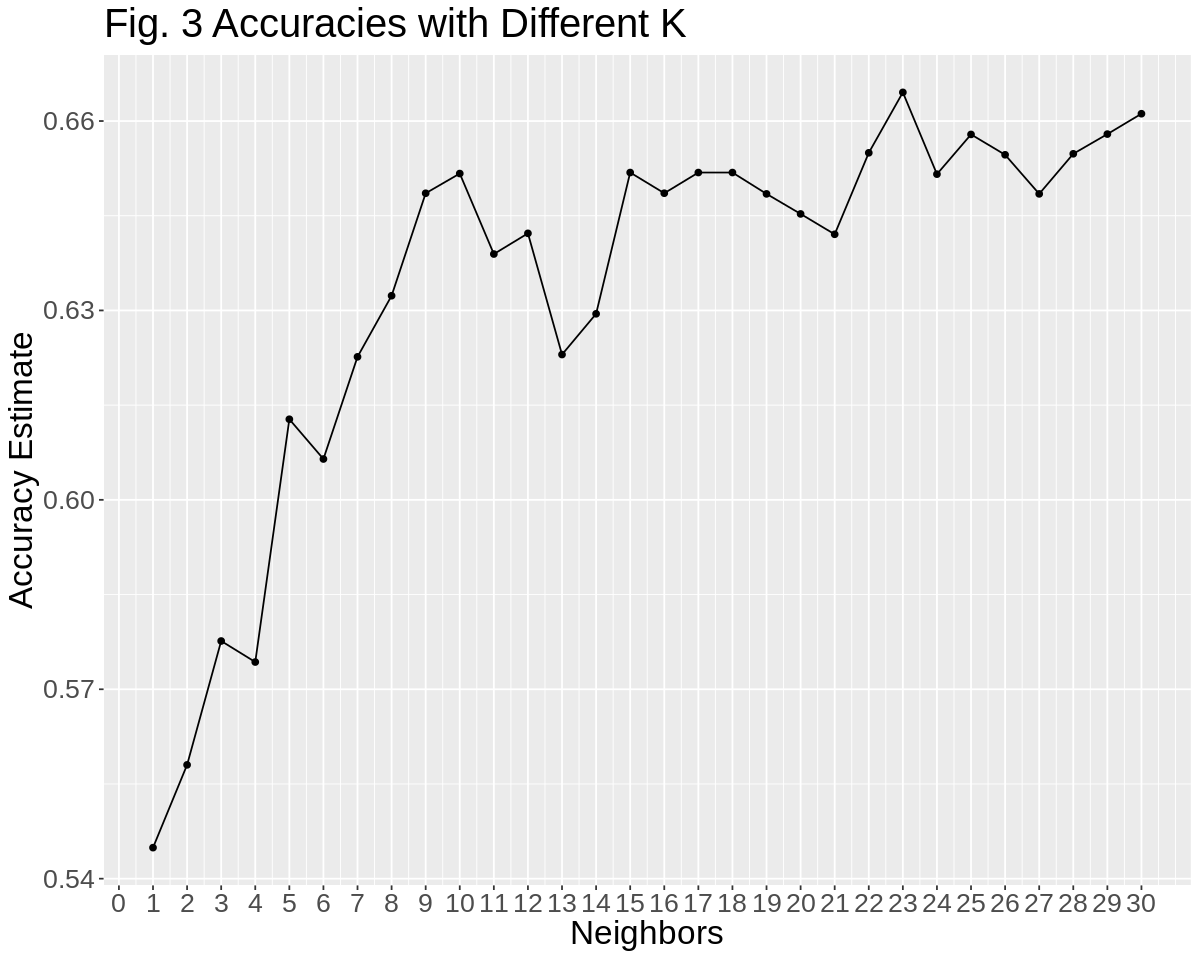

In [87]:
# Below we will plot a graph to determine the best k
accuracies <- heart_disease_results %>%
    filter(.metric == "accuracy") # accuracy only
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    ggtitle("Fig. 3 Accuracies with Different K") +
    scale_x_continuous(breaks = seq(0, 30, by = 1))+   
    theme(text = element_text(size = 20))

accuracy_versus_k

- From figure.3, we can see the best k with highest accuracy around 0.7 is k = 23, we will use this value to construct the model.

In [88]:
# Obtain the K with highest accuracy
heart_disease_max <- accuracies %>%
    arrange(desc(mean)) %>%
    slice(1)

heart_disease_max

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
23,accuracy,binary,0.6645388,5,0.03990775,Preprocessor1_Model23


<table>
    <caption>Table 1.4 K-value with highest accuracy</caption>
    <tr>
        <th>neighbors</th>
        <th>metric</th>
        <th>estimator</th>
        <th>mean</th>
        <th>n</th>
        <th>standard error</th>
        <th>config</th>
    </tr>
    <tr>
        <td>23</td>
        <td>accuracy</td>
        <td>binary</td>
        <td>0.66</td>
        <td>5</td>
        <td>0.04</td>
        <td>Preprocessor1_Model23</td>
    </tr>
</table>

- table1.4 reports the best K, with the highest accuracy

In [89]:
k_max <- heart_disease_max %>%
    pull(neighbors) # obtain the value of k with highest accuracy
heart_disease_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_max) %>% # replace with k-min
    set_engine("kknn") %>%
    set_mode("classification")
heart_disease_best_fit <- workflow() %>% # create the workflow with the updated specification and model
    add_recipe(heart_disease_recipe) %>%
    add_model(heart_disease_best_spec) %>% # use the new specification
    fit(data = heart_disease_training)

### Compute the Accuracy

In [90]:
# fit the model with testing set
heart_disease_predictions <- predict(heart_disease_best_fit, heart_disease_testing) |>
  bind_cols(heart_disease_testing)

heart_disease_predictions

.pred_class,trestbps,thalach,exang
<fct>,<dbl>,<dbl>,<fct>
0,105,166,0
0,110,156,0
0,135,150,0
⋮,⋮,⋮,⋮
0,150,122,0
0,140,140,1
0,140,125,1


<table>
    <caption>Table 1.5 Prediction of heart disease (10 out of 104)</caption>
    <tr>
        <th>resting bp</th>
        <th>achieved heart rate</th>
        <th>predicted angina</th>
        <th>actual angina</th>
    </tr>
    <tr>
        <td>105</td>
        <td>166</td>
        <td>no</td>
        <td>no</td>
    </tr>
    <tr>
        <td>110</td>
        <td>156</td>
        <td>no</td>
        <td>no</td>
    </tr>
    <tr>
        <td>135</td>
        <td>150</td>
        <td>no</td>
        <td>no</td>
    </tr>
    <tr>
        <td>95</td>
        <td>144</td>
        <td>no</td>
        <td>no</td>
    </tr>
    <tr>
        <td>125</td>
        <td>176</td>
        <td>no</td>
        <td>no</td>
    </tr>
    <tr>
        <td>...</td>
        <td>...</td>
        <td>...</td>
        <td>...</td>
    </tr>
    <tr>
        <td>136</td>
        <td>199</td>
        <td>yes</td>
        <td>yes</td>
    </tr>
    <tr>
        <td>140</td>
        <td>119</td>
        <td>yes</td>
        <td>yes</td>
    </tr>
    <tr>
        <td>150</td>
        <td>122</td>
        <td>no</td>
        <td>no</td>
    </tr>
    <tr>
        <td>140</td>
        <td>140</td>
        <td>no</td>
        <td>yes</td>
    </tr>
    <tr>
        <td>140</td>
        <td>125</td>
        <td>no</td>
        <td>yes</td>
    </tr>
</table>

- Table1.5 reports the prediction of heart disease, we show 10 out of 104 here.

In [91]:
# calculate the accuracy
prediction_accuracy <- heart_disease_predictions |>
  metrics(truth = exang, estimate = .pred_class) |>
  filter(.metric == "accuracy")
prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7115385


<table>
    <caption>Table 1.6 Accuracy of predictions</caption>
    <tr>
        <th>metric</th>
        <th>estimator</th>
        <th>estimate</th>
    </tr>
    <tr>
        <td>accuracy</td>
        <td>binary</td>
        <td>0.712</td>
    </tr>
</table>

- Table1.6 shows the accuracy of our estimator which is around 71%, indicating the model could still be improved.

In [92]:
# create the confusion table
confusion <- heart_disease_predictions |>
             conf_mat(truth = exang, estimate = .pred_class)
confusion

          Truth
Prediction  0  1
         0 59 21
         1  9 15

Fig. 4 Confusion Matrix
<br/>
<p style="font-family: Courier">&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Truth</p>
<p style="font-family: Courier">Prediction 0 &emsp; 1</p>
<p style="font-family: Courier">&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;0 &ensp;59 &ensp;21</p>
<p style="font-family: Courier">&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;1 &emsp;9 &emsp; 15</p>


- We can see the comparison from figure.4 that for people who do not have angina, the classifier correctly predicted 59 and for people who have angina, the classifier has 15 correct predicts. However, there are still certain issues exist. We can see that there are still 21 cases that predict the people who have angina as no angina. For the wrong predictions, there are still 21 cases that predict the people who have angina as no angina, this is very dangerous when the model is used in reality since it might cause potential threats to people's lives. Thus, the model still needs improvements.

### Visualization for the result

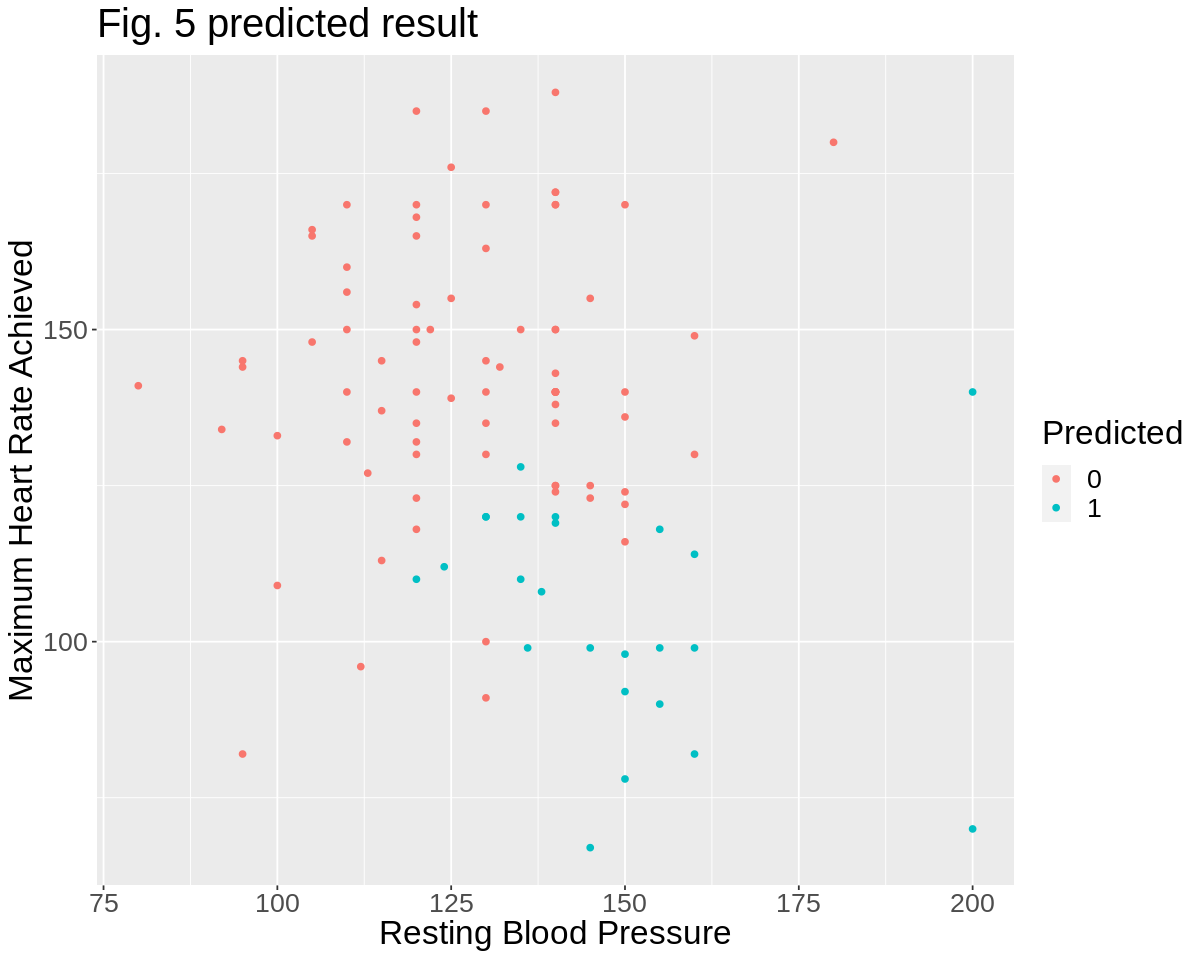

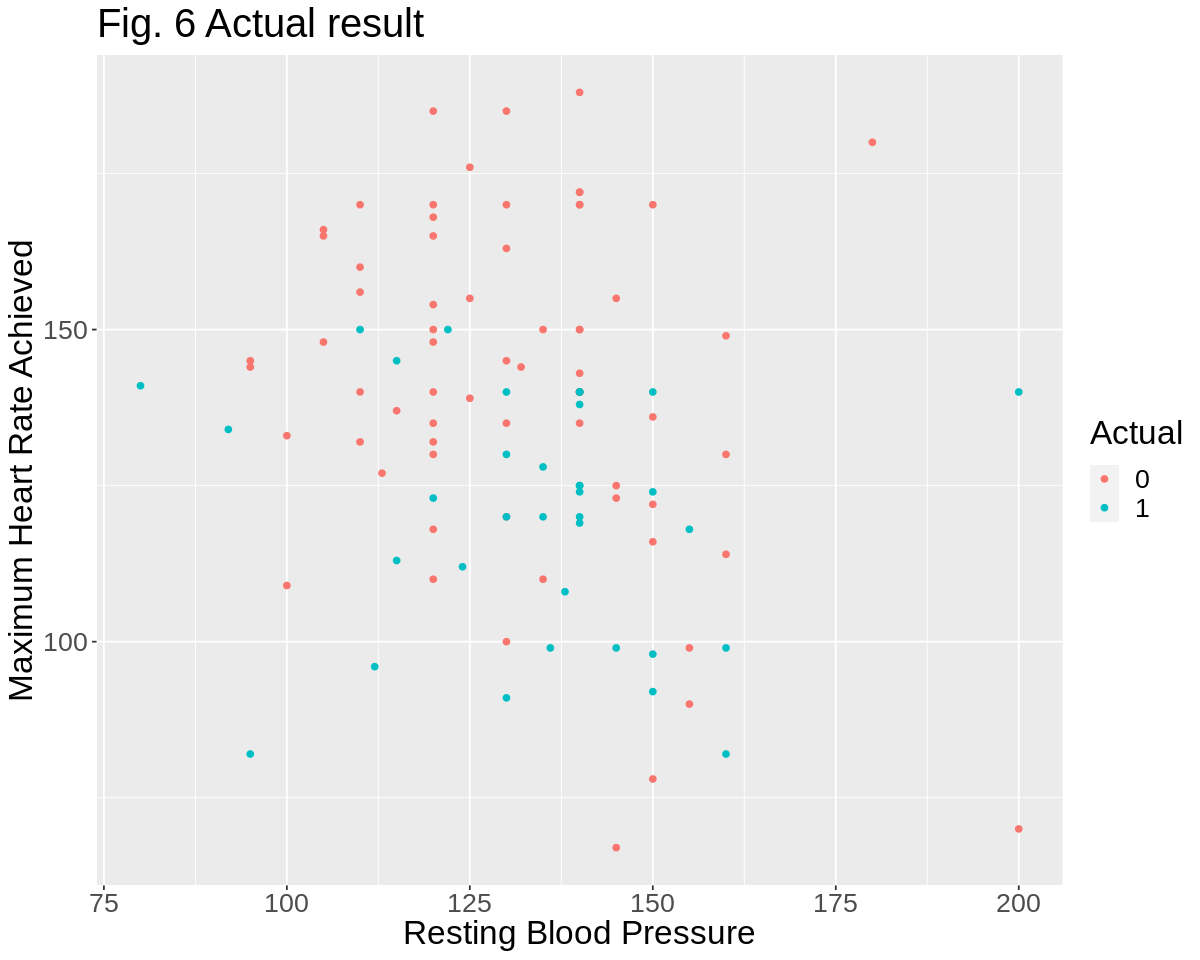

In [93]:
result_prediction <- ggplot(heart_disease_predictions, aes(x = trestbps, y = thalach, color = .pred_class))+
    geom_point() +
    labs(x = "Resting Blood Pressure", y = "Maximum Heart Rate Achieved", color = "Predicted") +
    ggtitle("Fig. 5 predicted result") +
    theme(text = element_text(size = 20))

result_actual <- ggplot(heart_disease_predictions, aes(x = trestbps, y = thalach, color = exang))+
    geom_point() +
    labs(x = "Resting Blood Pressure", y = "Maximum Heart Rate Achieved", color = "Actual") +
    ggtitle("Fig. 6 Actual result") +
    theme(text = element_text(size = 20))
result_prediction
result_actual


- Through Fig. 5 and Fig. 6, although most of the predictions are correct, we can still clearly see that there are some wrong perdict in the predictions of our k-nn classification model. The reason of this could cause serious consequences, we should keep trying to raise the accuracy if we want to use this model in real life.

## Discussion

- According to the k-nn classification model, we found that our model has around 70% accuracy. We correctly predict 74 observations out of 104 observations, which means we can use `trestbps`(resting systolic blood pressure in mmHg) and `thalach` (maximum heart rate achieved in bpm) to predict `exang`(if a patient has exercise-induced angina or not). 70% of predictions are correct could consider as a high rate, but it is not high enough for us to use this model in the real life. We should ensure the model has as high as possible accuracy before using it in the real life. We think that the reason for getting this accuracy is because we are only using two variables, and there could be many differences between different individuals. Adding more dimensions may help refine the model, such as adding age and blood cholesterol as predictors. A regression model can also be made with ST slope as the target variable, where ST depression indicates angina. This may also improve precision since the target variable is continuous and allows for nuance. Any future models will require experimenting with the other predictors for greater accuracy.

- Using `trestbps` and `thalach` from the `heart_disease_data_final` to create a k-nn classification model and predict `exang` is what we expect to do. We successfully made the k-nn classification model and predict `exang` and have around 70% accuracy, so this is what we expect to find.

- If we can create a prediction model that has higher accuracy(around 90%), this model can help a lot in the medical field. This model can help patients predict if they have the possibility to have exercise-induced angina. If we also have another model that can predict heart disease, we can combine these models to estimate if the patient has heart disease or the possibility to have heart disease.

- The problem that would happen in the future could be how can we increase the accuracy of the model, and balance the weight of different variables if we add more variables into the model. The biggest issue at the moment is the model's lack of precision. From Fig. 1 we can see that there is a large overlap between the two categories, making it difficult to clearly delineate for classification.

## References

- Aha, David W. “Heart Disease Data Set.” UCI Machine Learning Repository, 1988, https://archive.ics.uci.edu/ml/datasets/Heart+Disease.  
    1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
    2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
    3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
    4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.
<br/><br/>
- Caopone, Paolo, and Renato Mayol. “Celiprolol in the Treatment of Exercise Induced Angina Pectoris.” Journal of Cardiovascular Pharmacology, 1986, https://journals.lww.com/cardiovascularpharm/Abstract/1986/08004/Celiprolol_in_the_Treatment_of_Exercise_Induced.31.aspx.

- “Coronary Heart Disease, Myocardial Infarction, and Stroke - A Public Health Issue.” Centers for Disease Control and Prevention, Centers for Disease Control and Prevention, 30 July 2019, https://www.cdc.gov/aging/publications/coronary-heart-disease-brief.html.

- Kaski, Juan Carlos, et al. “Effects of Angiotensin-Converting Enzyme Inhibition on Exercise-Induced Angina and ST Segment Depression in Patients with Microvascular Angina.” Journal of the American College of Cardiology, Elsevier, 29 Mar. 2004, https://www.sciencedirect.com/science/article/pii/0735109794907501.